In [104]:
# Packages needed for plots and analysis. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import itertools as it
import seaborn as sns
import scipy.cluster.hierarchy as sch
sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [105]:
dfo=pd.read_csv("./la_powder.csv", sep=",") #LA-ICP-MS data of the powder samples
dfs=pd.read_csv("./la_SI.csv", sep=",") #LA-ICP-MS data of the Slag Incluison 
dfb=pd.read_csv("./la_bloom.csv", sep=",", na_values = 0 ).fillna(0.01) #LA-ICP-MS data of the bloom

In [106]:
# Removing Sandstone, outliers and average mesurments
masko =  (dfo["Material"] == "Sandstone") | (dfo["Site"] == "Imbasch")  | (dfo["Site"] == "Stumpfwald")
masks =  (dfs["Mesurment"] != "Unique")
maskb = (dfb["Measurement"] != "Unique")
dfo = dfo.drop(index = dfo.loc[masko].index).reset_index(drop = True)
dfs = dfs.drop(index = dfs.loc[masks].index).reset_index(drop = True)
dfb = dfb.drop(index = dfb.loc[maskb].index).reset_index(drop = True)


In [107]:
dfo =dfo.drop(columns=['Sb', 'Pb','Sr', 'Cs','Ga', 'Zn','U/Th', 'Lu/Hf', 'Zr/Hf', 'Nb/Ta'])


In [108]:
dfs =dfs.drop(columns=['Na2O', 'MgO', 'Al2O3',
       'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO', 'MnO',
       'Fe2O3', 'Sb' , 'Sr', 'Cs', 'Ga', 'Zn', ])

In [109]:
dfb =dfb.drop(columns=['Na2O', 'MgO', 'Al2O3',
       'SiO2', 'P2O5', 'K2O','CaO', 'TiO', 'MnO',
       'Fe2O3', 'Pb','Sr', 'Cs', 'Ga', 'Zn'])

In [110]:
#list of compounds/elements for each normalization 
Main=[ 'MgO (%)', 'Al2O3 (%)', 'SiO2 (%)',
       'K2O (%)', 'CaO (%)', 'MnO (%)',]

Trace=['La','Y', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Er', 'Yb', 'Th', 'U']
#each normalization is done separetely 

In [111]:
key = ["Sample", "Material"]
xto = dfo.loc[:, key +Trace]#.values
y = dfo.loc[:,["Sample"]].values
elements = ['Th', 'Pr', 'Tb', 'Dy', 'U', 'Er']

def logfun(s, e): #s is a table row and e is the list of elements used to define your new variable
    n = len(e) # number of elements 
    se = s.loc[e] # Values of the elements asociate a chosen elements
    term1 = s.apply(np.log10) # logaritm of each ealment of the row
    term2 = 1/n * se.apply(np.log10).sum() # sum of algoritms of the chosen elements divided by n
    return term1 - term2
# 
xto.loc[:, Trace] = xto.loc[:, Trace].apply(lambda x: logfun(x, elements), axis = 1) # define the variable "X_E"

In [112]:
xmo = dfo.loc[:, key+Main]#.values
y = dfo.loc[:,["Sample"]].values
elements = ['SiO2 (%)','CaO (%)','MnO (%)']

def logfun(s, e): 
    n = len(e) 
    se = s.loc[e] 
    term1 = s.apply(np.log10) 
    term2 = 1/n * se.apply(np.log10).sum()
    return term1 - term2
xmo.loc[:,Main] = xmo.loc[:,Main].apply(lambda x: logfun(x, elements), axis = 1)

In [113]:
xo = xto.merge(xmo, how = 'inner', on = key)

In [114]:
key = ["Key", "Sample", "Material"]
xtb = dfb.loc[:, key +Trace]#.values
y = dfb.loc[:,["Sample"]].values
elements = ['Th', 'Pr', 'Tb', 'Dy', 'U', 'Er']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
#xtb.loc[:, Trace ]
# 
xtb.loc[:, Trace ] = xtb.loc[:,Trace].apply(lambda x: logfun(x, elements), axis = 1)# definir la variable "X_E"

In [115]:
key = ["Key", "Sample", "Material"]
xmb = dfb.loc[:, key + Main]#.values
y = dfb.loc[:,["Sample"]].values
elements = ['SiO2 (%)','CaO (%)','MnO (%)']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
# 
xmb.loc[:,Main] = xmb.loc[:,Main].apply(lambda x: logfun(x, elements), axis = 1).values # definir la variable "X_E"

In [116]:
xb = xtb.merge(xmb, how = 'inner', on = key)#.drop(columns= "Key")

In [117]:
key = ["Key", "Sample", "Material"]
xts = dfs.loc[:, key + Trace]#.values
y = dfs.loc[:,["Sample"]].values
elements = ['Th', 'Pr', 'Tb', 'Dy', 'U', 'Er']

def logfun(s, e): 
    n = len(e) 
    se = s.loc[e] 
    term1 = s.apply(np.log10) 
    term2 = 1/n * se.apply(np.log10).sum() 
    return term1 - term2
xts.loc[:,Trace] = xts.loc[:,Trace].apply(lambda x: logfun(x, elements), axis = 1).values 

In [118]:
key = ["Key", "Sample", "Material"]
xms = dfs.loc[:, key + Main]#.values
y = dfs.loc[:,["Sample"]].values
elements = ['SiO2 (%)','CaO (%)','MnO (%)']

def logfun(s, e):
    n = len(e) 
    se = s.loc[e]
    term1 = s.apply(np.log10)
    term2 = 1/n * se.apply(np.log10).sum() 
    return term1 - term2
# 
xms.loc[:, Main] = xms.loc[:, Main].apply(lambda x: logfun(x, elements), axis = 1).values 

In [119]:
xs = xts.merge(xms, how = 'inner', on = key)#.drop(columns= "Key")

In [120]:
#final data frame of the logaritmic normalization of the trace elements. 
dfs = [xts, xtb, xto] 
#dfs =[xs, xb, xo]   #switch to this if you want to also use main elements 

mv = pd.concat(dfs, ignore_index = True)
mv

,Key,Sample,Material,La,Y,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Er,Yb,Th,U
0,1.0,MA-201419,Iron-SI,0.882914,1.114744,1.119571,0.234077,0.833081,0.207604,-0.387857,0.238337,-0.602866,0.200548,0.007039,-0.024036,0.072396,0.088805
1,2.0,MA-201419,Iron-SI,0.885917,1.100510,1.125032,0.224327,0.816367,0.174809,-0.396868,0.251829,-0.618282,0.227126,0.017704,-0.017854,0.075884,0.073241
2,3.0,MA-201419,Iron-SI,0.887353,1.089420,1.125801,0.222401,0.806315,0.116394,-0.439117,0.289569,-0.565482,0.198799,-0.004339,0.009564,0.099835,0.048786
3,4.0,MA-201419,Iron-SI,0.878565,1.102053,1.111872,0.205763,0.837459,0.126950,-0.388997,0.241374,-0.593117,0.227303,0.013264,-0.062775,0.070897,0.075889
4,5.0,MA-201419,Iron-SI,0.888333,1.118046,1.132312,0.235692,0.841139,0.196500,-0.401937,0.266319,-0.585305,0.198809,-0.003735,-0.034711,0.068130,0.086409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,NaN,MA-201432,Ore,0.670642,0.883604,1.213924,0.142230,0.736802,0.210765,-0.414072,0.144082,-0.573773,0.201149,-0.080857,-0.106411,0.278165,0.033086
139,NaN,MA-201433,Ore,0.552964,1.119230,1.345533,0.020825,0.594856,0.060170,-0.512155,0.160487,-0.518589,0.235120,0.049788,-0.012225,0.081848,0.131008
140,NaN,MA-201434,Ore,0.817453,0.962136,1.113404,0.292324,0.897195,0.292324,-0.306365,0.324912,-0.490363,0.250932,-0.037864,-0.128783,0.138227,-0.153257
141,NaN,MA-201535,Ore,0.845271,1.068801,0.837380,0.313752,0.905114,0.322526,-0.302867,0.312386,-0.490387,0.261661,-0.014716,-0.095936,-0.176520,0.106210


In [121]:
features = list(mv.columns)
features.remove("Sample")
features.remove("Key")
features.remove("Material")

ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele

x = mv.loc[:, features]#.values
y = mv.loc[:,["Sample"]].values




In [122]:
#PCA Calculation
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data = principalComponents,
                   columns = ["PCA" + str(i+1) for i in range(len(features))])
pdf["Sample"] = y
pdf["Material"] = mv["Material"]
exp_var_pca = pca.explained_variance_ratio_
#"{:.2f}%".format(exp_var[0]*100)
vectors_pca = pca.components_[:2, :].T #* np.sqrt(pca.explained_variance_[:2])
pca.explained_variance_ratio_.cumsum()

array([0.59768089, 0.82876243, 0.88879001, 0.92152547, 0.94621558,
       0.96027846, 0.97257101, 0.98266573, 0.98858003, 0.99318523,
       0.99644737, 0.998669  , 1.        , 1.        ])

In [123]:
pcas_v = pca.explained_variance_ratio_
labels = ["PCA" + str(i) for i in range(1, 1+len(a))]


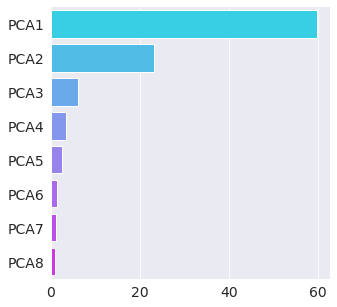

In [124]:
#plot of the variancie explain for each pca
fig, ax = plt.subplots(1, figsize=(5,5))
sns.barplot(y = labels[:8], x= pcas_v[:8]*100, ax = ax, palette = "cool")
sns.despine()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("./plots/MV/PCA_var.png", dpi=200) 

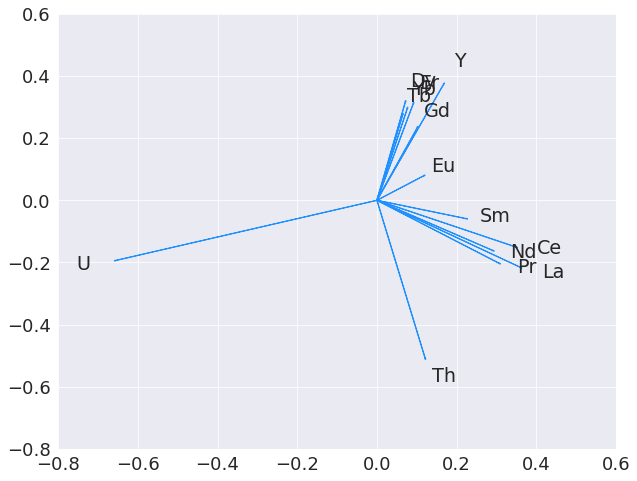

In [125]:
# plot of the eigenvectors
fig, ax = plt.subplots(1, figsize=(10,8))
for u, v, f in zip(vectors_pca[:,0], vectors_pca[:,1], features):
    sns.set_style("white")
    sns.despine()
    ax.arrow(0, 0, u, v, color = "dodgerblue")
    ax.text(u * 1.15, v * 1.15, f, size = "large")
ax.set_xlim(-0.8,0.6)
ax.set_ylim(-0.8,0.6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("./plots/MV/PCA_vectors.png", dpi=200)

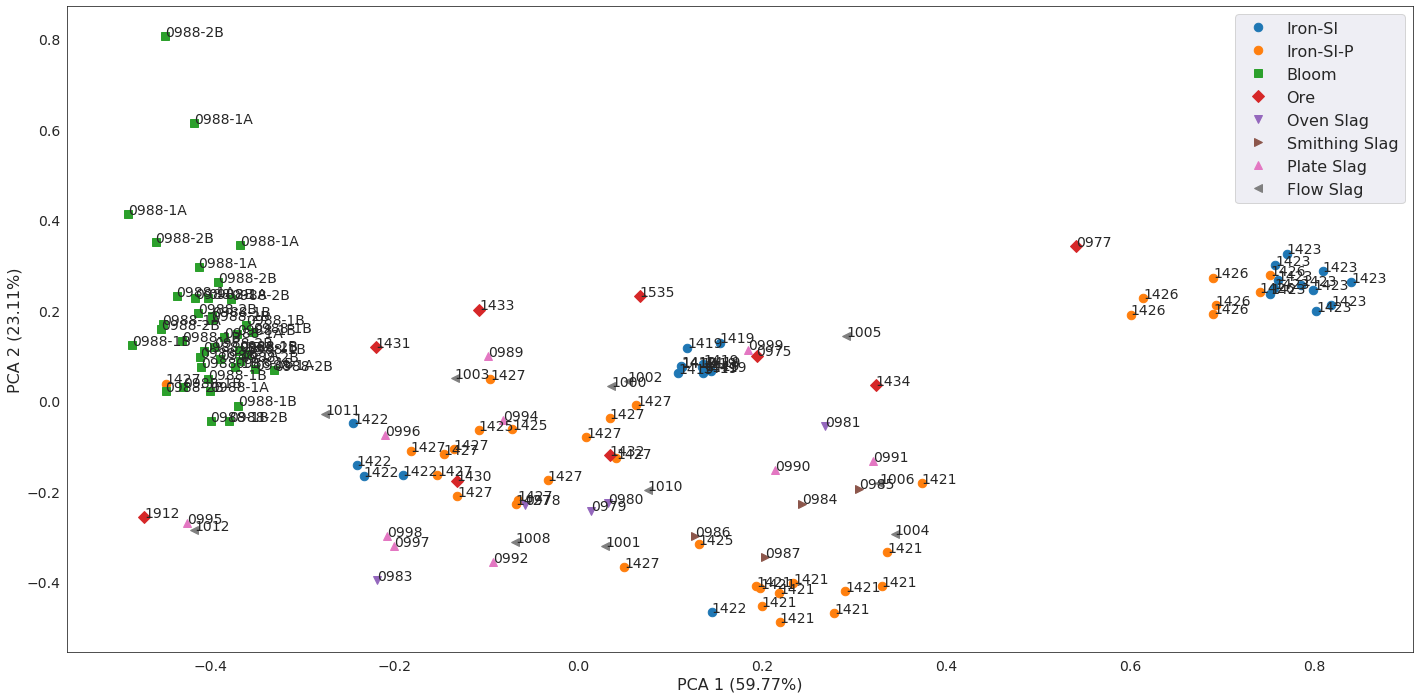

In [126]:
#plot pca 1 pca 2
mark_dict = {"Iron-SI": "o", "Iron-SI-P": "o", 
             "Bloom": "s", "Ore": "D", "Oven Slag": "v",
             "Plate Slag": "^", "Flow Slag": "<", "Smithing Slag": ">" }

fig, ax = plt.subplots(1, figsize=(20,10))
for s in pdf["Material"].unique():
    #s=s[0]
    mask=(pdf["Material"] == s)
    df_sample = pdf[mask]
    xx = df_sample["PCA1"].values
    yy = df_sample["PCA2"].values
    ss = df_sample["Sample"].values
    ax.plot(xx, yy, label = s, marker=mark_dict[s], linestyle="", markersize= 8.5)
    for xxi, yyi, ssi in zip(xx,yy,ss):
        ax.text(xxi, yyi, ssi.replace("MA-20", ""), fontsize= 14)
    ax.legend()
    plt.xlabel('PCA 1 ({})'.format("{:.2f}%".format(exp_var_pca[0]*100)), fontsize=16)
    plt.ylabel('PCA 2 ({})'.format("{:.2f}%".format(exp_var_pca[1]*100)), fontsize=16)
    plt.xticks(fontsize=14)
    sns.set_style("darkgrid")
    plt.yticks(fontsize=14)
    ax.legend(loc='best', fontsize=16)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
fig.savefig("./plots/MV/PCA_ree_samples.png", dpi=200)

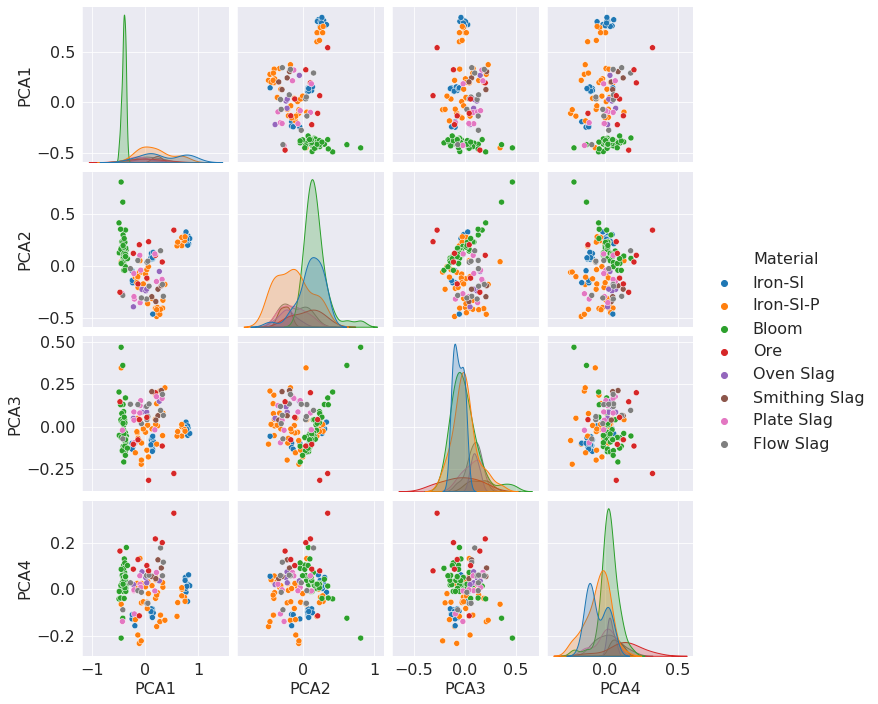

In [127]:
# scatter matrix plot of first 4 pca 
Pcs = ["Material","PCA1","PCA2","PCA3","PCA4"]
PCA1 = pdf[Pcs]
fig = sns.pairplot(PCA1, hue="Material")
fig.savefig("./plots/MV/PCA_ree.png", dpi=200)

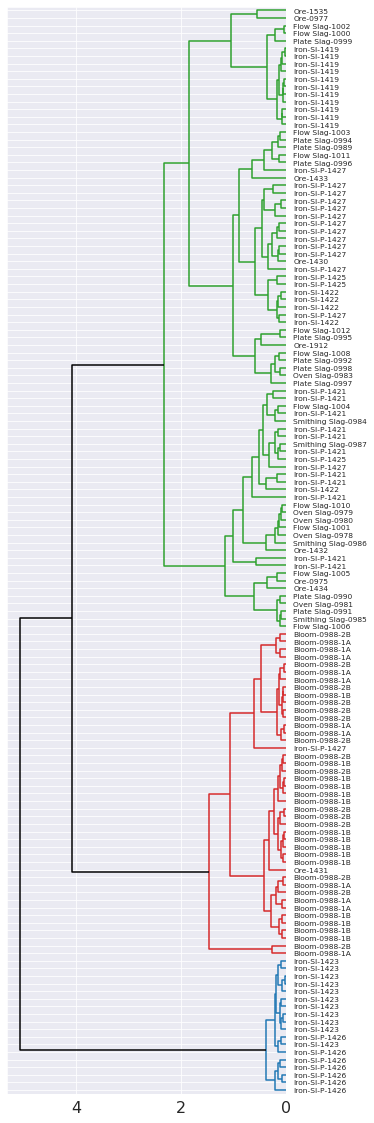

In [128]:
#Hirercal cluster analysis of the PCAs
Pcs = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
PCA1 = pdf[Pcs]
fig, ax = plt.subplots(1, figsize=(5,20))

dendrogram = sch.dendrogram(sch.linkage(PCA1, method = "ward"), ax = ax, 
                            labels=(pdf["Material"]+"-"+pdf["Sample"].str.replace("MA-20", "")).values,
                           above_threshold_color='k', orientation= "left")

#ax.set_title("Cluster Dendrogram PCA",fontsize=12)
sch.set_link_color_palette(["tab:blue","tab:red","tab:green"])
ax.tick_params(axis = "y", labelsize = 7.5)

fig.savefig("./plots/MV/cluster_ree_ward.png", bbox_inches="tight", dpi=300)


In [129]:
#LDA Calculations 
features = list(mv.columns)
features.remove("Sample")
features.remove("Key")
features.remove("Material")

ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele


x = mv.loc[:, features]#.values
y = mv.loc[:,"Material"].values


lda = LDA()
ldf = lda.fit_transform(x, y)
ldf = pd.DataFrame(data = ldf, columns = ["LDA" + str(i+1) for i in range(ldf.shape[1])])
ldf["Material"] = y
ldf["Sample"] = mv["Sample"]
exp_var_lda = lda.explained_variance_ratio_
#"{:.2f}%".format(exp_var[0]*100)
lda.explained_variance_ratio_.cumsum()
vectors_lda = lda.scalings_[:, :2]
vectors_lda
lda.explained_variance_ratio_.cumsum()

array([0.75730433, 0.88937504, 0.95726996, 0.99047661, 0.9979241 ,
       0.99977244, 1.        ])

In [130]:
lda_v = lda.explained_variance_ratio_
label = ["LDA" + str(i) for i in range(1, 1+len(b))]

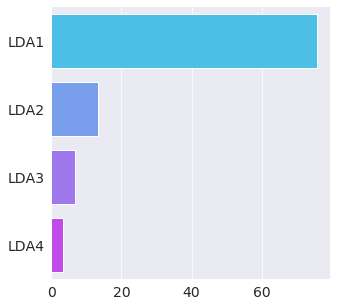

In [131]:
# plot of ariance explain for the LDAs
fig, ax = plt.subplots(1, figsize=(5,5))
sns.barplot(y = label[:4], x= lda_v[:4]*100, ax = ax, palette = "cool")
sns.despine()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("./plots/MV/LDA_var.png", dpi=200)

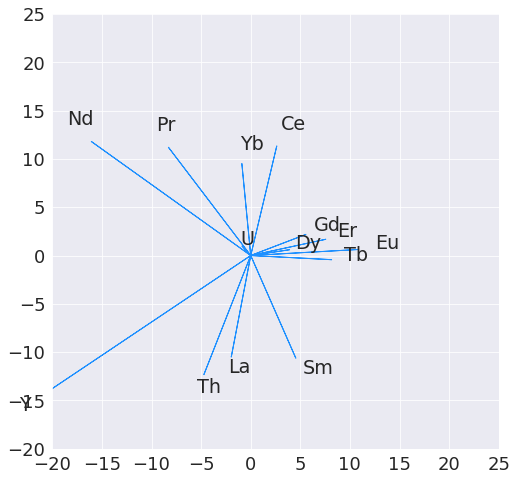

In [132]:
# plot of the eigenvectors
fig, ax = plt.subplots(1, figsize=(8,8))
for u, v, f in zip(vectors_lda[:,0], vectors_lda[:,1], features):
    sns.set_style("white")
    sns.despine()
    ax.arrow(0, 0, u, v, color = "dodgerblue")
    ax.text(u * 1.15, v * 1.15, f, size = "large")
ax.set_xlim(-20,25)
ax.set_ylim(-20,25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("./plots/MV/LDA_vectors.png", dpi=200)


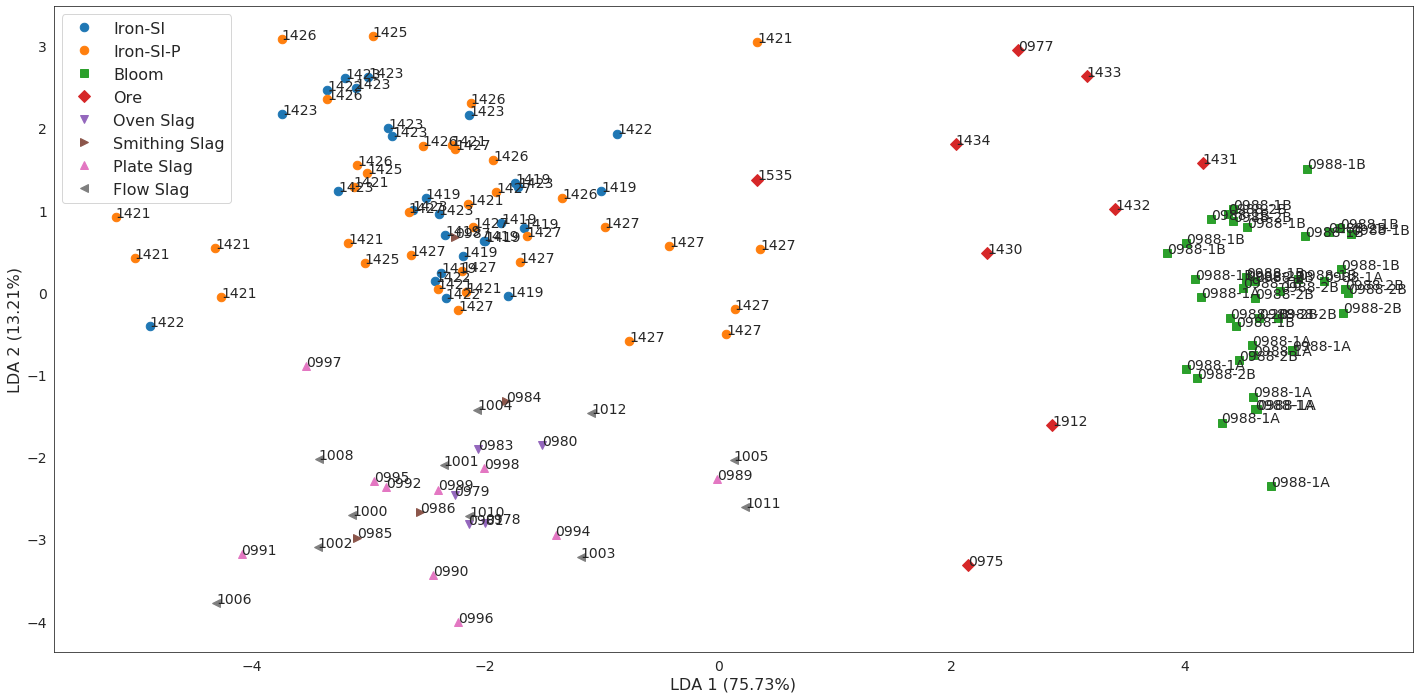

In [133]:
#PLOT LDA 1 + 2 
mark_dict = {"Iron-SI": "o", "Iron-SI-P": "o", 
             "Bloom": "s", "Ore": "D", "Oven Slag": "v",
             "Plate Slag": "^", "Flow Slag": "<", "Smithing Slag": ">"  }

fig, ax = plt.subplots(1, figsize=(20,10))
for s in ldf["Material"].unique():
    #s=s[0]
    mask=(ldf["Material"] == s)
    df_sample = ldf[mask]
    xx = df_sample["LDA1"].values
    yy = df_sample["LDA2"].values
    ss = df_sample["Sample"].values
    ax.plot(xx, yy, label = s, marker=mark_dict[s], linestyle="",markersize= 8.5)
    for xxi, yyi, ssi in zip(xx,yy,ss):
        ax.text(xxi, yyi, ssi.replace("MA-20", ""), fontsize= 14)
    ax.legend()
    plt.tight_layout()
    plt.xlabel('LDA 1 ({})'.format("{:.2f}%".format(exp_var_lda[0]*100)), fontsize=16)
    plt.ylabel('LDA 2 ({})'.format("{:.2f}%".format(exp_var_lda[1]*100)), fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.legend(loc='best', fontsize=16)
    plt.rcParams.update({'font.size': 16})
fig.savefig("./plots/MV/LDA_ree_samples.png", dpi=200)


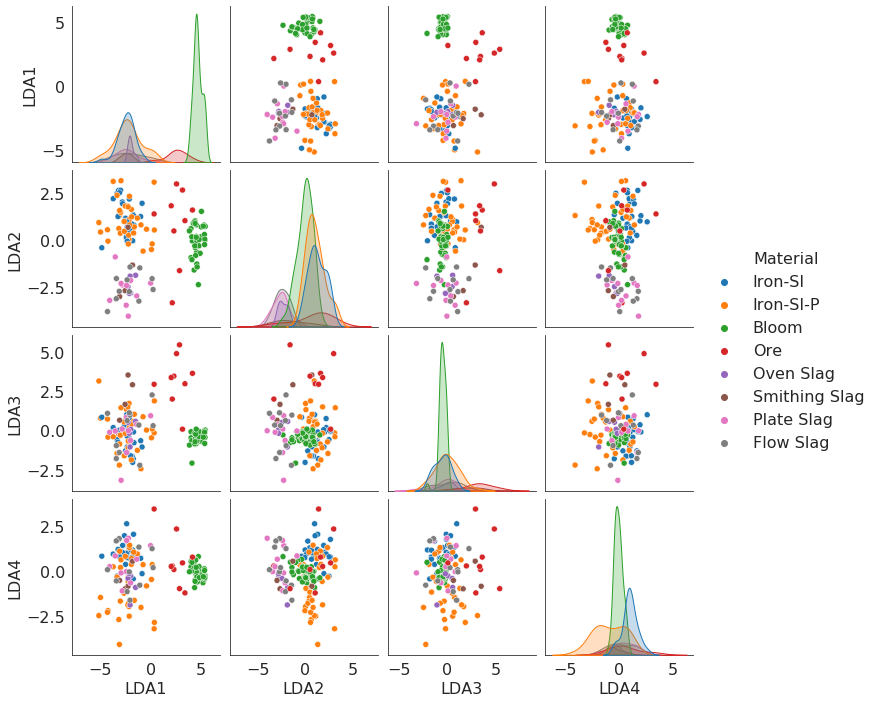

In [134]:
#Scatter matrix of LDAs
ldfs = ["Material","LDA1","LDA2","LDA3","LDA4"]
LDA1 = ldf[ldfs]
fig = sns.pairplot(LDA1, hue="Material")
fig.savefig("./plots/MV/LDA_S_ree.png", dpi=200)

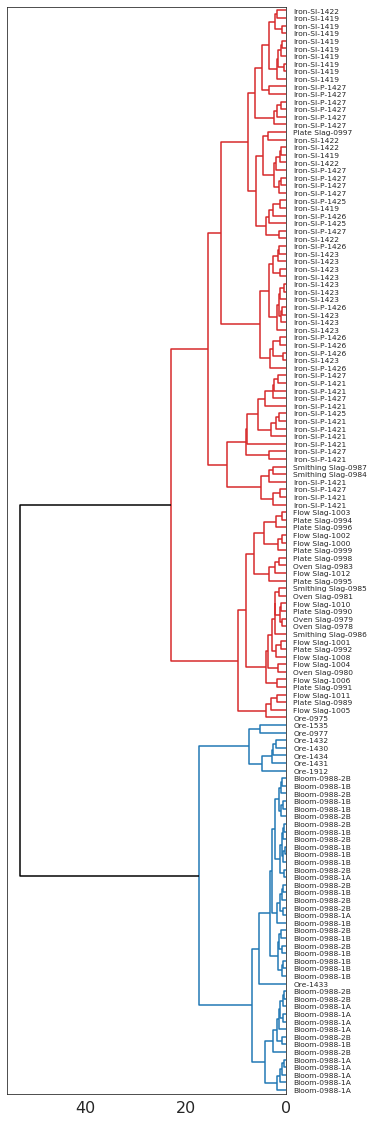

In [135]:
#HCA of the LDA
lds = ["LDA1","LDA2","LDA3","LDA4","LDA5","LDA6"]
LDA1 = ldf[lds]
fig, ax = plt.subplots(1, figsize=(5,20))

dendrogram = sch.dendrogram(sch.linkage(LDA1, method = "ward"),  ax = ax,
                            labels=(pdf["Material"]+"-"+pdf["Sample"].str.replace("MA-20", "")).values,
                            orientation= "left", above_threshold_color='k' )
sch.set_link_color_palette(["tab:blue","tab:red","tab:green"])
#ax.set_title("Cluster Dendrogram LDA",fontsize=12)
ax.tick_params(axis = "y", labelsize = 7.5)

fig.savefig("./plots/MV/lda_cluster_ree_ward.png", bbox_inches="tight", dpi=300)